# Investigación corta 2
##### Natalia Rodriguez
# Aprendizaje Supervisado

Consiste en predecir una salida a partir de una entrada. Se trata de construir un modelo de apredizaje automático a partir de los pares entrada/salida. En el aprendizaje supervisado se tienen los siguientes métodos:


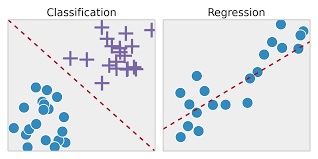


## 1. Clasificación
El Objetivo es predecir una clase, donde hay clasificación binaria o multiclase.

## 2. Regresión
El objetivo es predecir un número continuo. Hay continuidad en la salida.

# Set de datos

Se seleccionó el set de datos "Graduate Admissions", cuyo propósito es ayudar a estudiantes en la selección de universidades, dándoles una idea de las posibilidades que tienen para ingresar a una universidad en particular.
https://www.kaggle.com/mohansacharya/graduate-admissions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
#dataset_file="/home/natalia/Admission_Predict.csv"
dataset_file="Admission_Predict.csv"
datos = pd.read_csv(dataset_file)


## Tamaño del set de datos
El set de datos seleccionado consta de 400 ejemplos de 9 parámetros como se muesta a continuación:

In [3]:
print(datos.shape)

(400, 9)


Los parámetros que se incluyen en el set de datos se consideran importantes a la hora de aplicar a programas de maestría en ciertas universidades, estos son:

1. GRE Scores ( out of 340 )
2. TOEFL Scores ( out of 120 ) 
3. University Rating ( out of 5 ) 
4. Statement of Purpose and ( out of 5 ) 
5. Letter of Recommendation Strength ( out of 5 ) 
5. Undergraduate GPA ( out of 10 ) 
6. Research Experience ( either 0 or 1 ) 
7. Chance of Admit ( ranging from 0 to 1 )

A continuación se muestran los primeros 5 ejemplos del set de datos:

In [4]:
datos.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


Se eliminaron los parámetros "Serial No." y "University Rating" debido a que no son tan relevantes para esta investigación.

In [5]:
cols_to_use = ['GRE Score','TOEFL Score','SOP', 'LOR ','CGPA','Research','Chance of Admit ']


In [6]:
datos = datos[cols_to_use]


In [7]:
datos.isnull().values.any()

False

In [8]:
datos.shape

(400, 7)

In [9]:
datos.head()

,GRE Score,TOEFL Score,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4.5,4.5,9.65,1,0.92
1,324,107,4.0,4.5,8.87,1,0.76
2,316,104,3.0,3.5,8.00,1,0.72
3,322,110,3.5,2.5,8.67,1,0.80
4,314,103,2.0,3.0,8.21,0,0.65


# Preprocesado
Se ajustaron los datos de las columnas "GRE score" y "TOEFL score" con el objetivo de que sus valores se encuentren en el rango (0,1).

In [10]:
from sklearn import preprocessing
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

In [11]:
df = pd.DataFrame(datos[['GRE Score','TOEFL Score']])
escalador = preprocessing.MinMaxScaler(feature_range=(0,1))
rescaled_Gre=escalador.fit_transform(df)
datos[['GRE Score','TOEFL Score']]= pd.DataFrame(rescaled_Gre)

In [12]:
datos.head()

,GRE Score,TOEFL Score,SOP,LOR,CGPA,Research,Chance of Admit
0,0.94,0.928571,4.5,4.5,9.65,1,0.92
1,0.68,0.535714,4.0,4.5,8.87,1,0.76
2,0.52,0.428571,3.0,3.5,8.00,1,0.72
3,0.64,0.642857,3.5,2.5,8.67,1,0.80
4,0.48,0.392857,2.0,3.0,8.21,0,0.65


# Aprendizaje Supervisado


Como se mencionó anteriormente, se seleccionó el conjunto de datos "Graduate Admissions", el cual predice el chance de ser admitidos a partir de otros parámetros importantes como el GRE score, TOEFL score, etc.

Para los ejemplos de regresión se hará la predicción de el chance de ser admitidos, debido a que son valores continuos que se encuentran entre el rango de datos (0,1). En el caso de los ejemplos de clasificación se utilizará el mismo set de datos, pero se hará la predicción de si el estudiante tiene experiencia en investigación (parámetro "Research") basados en el resto de parámetros.


## Método 1: Linear Regression (Regresión)



In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

features = datos[['GRE Score','TOEFL Score','SOP', 'LOR ','CGPA','Research']]
labels =  datos[['Chance of Admit ']]

X_train, X_test, y_train, y_test = train_test_split(features, labels, random_state=13)


In [14]:
X_train.shape

(300, 6)

In [15]:
X_test.shape

(100, 6)

In [16]:
y_train.shape

(300, 1)

In [17]:
y_test.shape

(100, 1)

In [18]:
linearReg = LinearRegression().fit(X_train, y_train)

print("training: {:.3f}".format(linearReg.score(X_train, y_train)))
print("test: {:.3f}".format(linearReg.score(X_test, y_test)))


training: 0.807
test: 0.783


## Método 2: Logistic Regression (Clasificación)

A pesar de su nombre, este método se utiliza para clasificacion, por lo que en el set de datos se seleccionó la probabilidad de que el concursante haya realizado una investigación dependiendo del GRE score, TOEFL score y el chance de ser admitidos.

In [19]:
#datos.head()

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

features = datos[['GRE Score','TOEFL Score','SOP', 'LOR ','CGPA','Chance of Admit ']]
labels =  datos[['Research']]

X_train, X_test, y_train, y_test = train_test_split(features, labels, random_state=13)

logisticReg = LogisticRegression(solver='lbfgs').fit(X_train, y_train)

print("training: {:.3f}".format(logisticReg.score(X_train, y_train)))
print("test: {:.3f}".format(logisticReg.score(X_test, y_test)))

training: 0.800
test: 0.720



## Método 3: Naive Bayes (Gaussian para clasificación)
Naive Bayes es un set de algoritmos de aprendizaje supervisado basados en la aplicación del teorema de Bayes asumiendo independencia de los atributos entre si. Aprende a través de la recolección de estadísticas por clase de cada atributo. Existen tres tipos:

1. BernoulliNB: Datos binarios.
2. MultunomialNB: Datos representan un conteo.
3. GaussianNB: Datos on distribución Gaussiana.

In [21]:
#datos.head()

In [22]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

features = datos[['GRE Score','TOEFL Score','SOP', 'LOR ','CGPA','Chance of Admit ']]
labels =  datos[['Research']]

X_train, X_test, y_train, y_test = train_test_split(features, labels, random_state=42)

nbgaussian = GaussianNB().fit(X_train, y_train)
print("training: {:.3f}".format(nbgaussian.score(X_train, y_train)))
print("test: {:.3f}".format(nbgaussian.score(X_test, y_test)))

training: 0.773
test: 0.790


## Método 4: Decision Trees (Clasificación)

Los árboles de decisión pueden usarse para clasificación o regresión. Para este ejemplo se utilizara la versión de clasificación.

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

features = datos[['GRE Score','TOEFL Score','SOP', 'LOR ','CGPA','Chance of Admit ']]
labels =  datos[['Research']]

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

arbol = DecisionTreeClassifier(min_samples_split=100, random_state=15)
arbol.fit(X_train, y_train)

print("training: {:.3f}".format(arbol.score(X_train, y_train)))
print("test: {:.3f}".format(arbol.score(X_test, y_test)))

training: 0.797
test: 0.787


## Método 5: KNN (Clasificación)
Este método puede ser usado en el caso donde las etiquetas son valores continuos. La salida es calculada basada en la media de sus vecinos más cercanos. Este método puede ser usado para clasificación o regresión.

In [24]:
#datos.head()

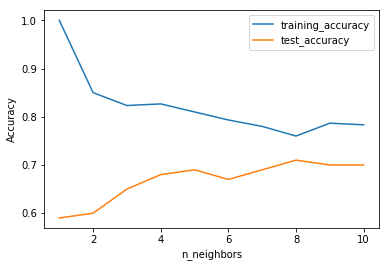

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

features = datos[['GRE Score','TOEFL Score','SOP', 'LOR ','CGPA','Chance of Admit ']]
labels =  datos[['Research']]

X_train, X_test, y_train, y_test = train_test_split(features, labels, random_state=13)

training_accuracy=[]
test_accuracy=[]

neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train.astype('int'))
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))
       
plt.plot(neighbors_settings, training_accuracy, label="training_accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test_accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()


## Método 6: KNN (Regresión)


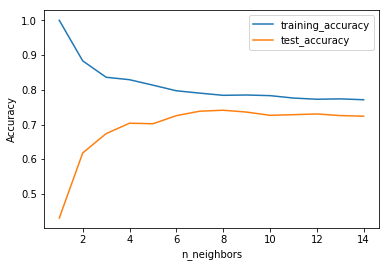

In [26]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

features = datos[['GRE Score','TOEFL Score','SOP', 'LOR ','CGPA','Research']]
labels =  datos[['Chance of Admit ']]

X_train, X_test, y_train, y_test = train_test_split(features, labels, random_state=13)

training_accuracy=[]
test_accuracy=[]

neighbors_settings = range(1, 15)

for n_neighbors in neighbors_settings:
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    training_accuracy.append(reg.score(X_train, y_train))
    test_accuracy.append(reg.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="training_accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test_accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()


# Métodos tipo Ensamble

El objetivo de los métodos de ensamble es combinar la predicción de varios estimadores. Se utilizan para ayudar a mejorar el rendimiento de los modelos de aprendizaje de máquina al mejorar su precisión.
Se distinguen dos familias de métodos de ensamble: "averaging" y "boosting".

## Método 7: Random Forest (Clasificación)
Este método es una combinación de árboles predictores donde cada árbol depende de los valores de un vector aleatorio probado de manera independiente y con la misma distribución para cada uno.



In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

features = datos[['GRE Score','TOEFL Score','SOP', 'LOR ','CGPA','Chance of Admit ']]
labels =  datos[['Research']]

X_train, X_test, y_train, y_test = train_test_split(features, labels, random_state=10)

rf = RandomForestClassifier(n_estimators=5).fit(X_train, y_train)

print("training: {:.3f}".format(rf.score(X_train, y_train)))
print("test: {:.3f}".format(rf.score(X_test, y_test)))

training: 0.977
test: 0.710


## Método 8:  Adaboost (Clasificación)
Este método propone entrenar una serie de clasificadores débiles ("weak learners") de manera iterativa, de manera que cada clasificador nuevo se enfoque en los datos que fueron erróneamente clasificados por su predecesor.

In [28]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier

features = datos[['GRE Score','TOEFL Score','SOP', 'LOR ','CGPA','Chance of Admit ']]
labels =  datos[['Research']]

X_train, X_test, y_train, y_test = train_test_split(features, labels, random_state=13)

ada = AdaBoostClassifier(n_estimators=10).fit(X_train, y_train)

print("training: {:.3f}".format(ada.score(X_train, y_train)))
print("test: {:.3f}".format(ada.score(X_test, y_test)))

training: 0.823
test: 0.720


# Resultados

Con el aprendizaje de máquina se quiere resolver el problema de aprender conceptos generales basados en ejemplos específicos.
El concepto de generalización ("generalization") se refiere a qué tan bien aplican los conceptos aprendidos por un modelo de aprendizaje de máquina a ejemplos específicos. El objetivo de un buen modelo es generalizar bien a partir del set de entrenamiento para hacer predicciones en datos que el modelo no ha visto. 

Existe alguna terminología utilizada en aprendizaje de máquina para describir qué tan bien un modelo aprende y generaliza en datos nuevos. Estos terminos son: "overfitting" y "underfitting". Estas son las dos grandes causas del desempeño pobre en algoritmos de aprendizaje de máquina.

## Fit
Se refiere a un modelo que modela muy bien el set de entrenamiento.

## Overfitting
El modelo aprende los detalles y el ruido del set de entrenamiento pero afecta negativamente el desempeno del modelo en datos nuevos. Aprende el ruido como si fuera parte de los datos. Esto impacta de manera negativa la habilidad de los modelos para generalizar.

## Underfitting
Esto se da cuando el modelo no puede modelar correctamente el set de entrenamiento y por  lo tanto tiene dificultad para generalizar nuevos datos.


# Tabla de Resultados

In [29]:
result = {'Metodo':['Training Score', 'Test score'],'Lin. Reg.':['0.807','0.783'],'Log. Reg.':['0.800','0.720'],'N. Bayes':['0.773','0.790'],'Dec. Trees':['0.797','0.787'],'Rand. Fores':['0.953','0.710'],'Adab.':['0.823','0.720']}
resultDataFrame = pd.DataFrame(result)
print(resultDataFrame)

           Metodo Lin. Reg. Log. Reg. N. Bayes Dec. Trees Rand. Fores  Adab.
0  Training Score     0.807     0.800    0.773      0.797       0.953  0.823
1      Test score     0.783     0.720    0.790      0.787       0.710  0.720


En la tabla anterior se puede notar que para este set de datos se da overfitting en los métodos Logistic regresion, Random forest y Adaboost.
Esto quiere decir que para ese set de datos el modelo no generaliza correctamente.

Debido a la similitud de los valores resultantes entre el set de entrenamiento y set de pruebas, se puede decir que existe un fit en los modelos de los metodos Linear regresion, Naive Bayes y Decision trees. En esos casos los modelos hicieron una buena generalizacion.